# MU5MEF06 Vortex Dynamics

## Dynamics of point vortices - Computer session

## Biot-Savart function

In [11]:
"""
@author: Ivan Delbende
(C) Sorbonne University 2021
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from copy import deepcopy
from IPython.display import HTML


def velo_BS(xv,yv,cv,delta2):
    """
    # Returns 2D Biot-Savart velocity components vx,vy
    # Input: xv,yv   vortex positions;
    #        cv      vortex circulations;
    #        delta2  Rosenhead desingularisation parameter;
    """
    nv = np.size(xv) 
    us2pi = 1./(2*np.pi)              # Constant 1/2pi
    vx = np.zeros((nv),float)
    vy = np.zeros((nv),float)
    for i in range(nv):
       lvx=0; lvy=0;
       for j in range(nv):
           if i != j:
               coef=cv[j]*us2pi/((xv[i]-xv[j])**2+(yv[i]-yv[j])**2+delta2);
               lvx=lvx-coef*(yv[i]-yv[j]);
               lvy=lvy+coef*(xv[i]-xv[j]);
       vx[i]=lvx
       vy[i]=lvy
    return vx,vy

## Physical parameters

In [65]:
# Number of vortices
nv = 2
# placed on a circle of radius
b=1
radius = b

# Vortex circulations
# circ = 0.5                     # Ref circ
# cv = circ*np.ones((nv),float)

# Dipole vortex Q1
circ1 = -1
circ2=1
cv = np.array([circ1,circ2])

#Dipole Q2
# circ1 = 0.5
# circ2=0.5
# cv = np.array([circ1,circ2])

#N vortex Q3
# circ1 = 1/nv
# circ2=1/nv
# circ3 = 1/nv
# circ4=1/nv
# circ5=1/nv
# circ6=1/nv
# cv = np.array([circ1,circ2,circ3,circ4,circ5,circ6])


#N=10 vortex
# circ=1/nv
# cv = circ*np.ones((nv),float)

#QUESTION E
# circ1 = 1
# circ2=1/2
# circ3 = -1/3
# cv = np.array([circ1,circ2,circ3])

# Vortex initial positions
xv = np.zeros((nv),float)
yv = np.zeros((nv),float)
xv = xv + radius*np.cos(2*np.pi*np.arange(nv)/nv)
yv = yv + radius*np.sin(2*np.pi*np.arange(nv)/nv)
# xv[0]=xv[0]+b/1000

# xv=np.array([0,1,1])
# yv=np.array([0,0,1/np.sqrt(3)])

## Numerical parameters

In [66]:
#Initial time
ts = 0

# Time step # It is up to you to check convergence (change dts)
dts = 0.25 * radius / np.sum(abs(cv)) 

# Rosenhead desingularisation (useful for vortex sheets)
delta2 = (radius/100)**2

## Visualisation/output parameters

In [67]:
# Window extent
# xmin = -2 ; xmax = 2 ; ymin = -2 ; ymax = 2 
xmin = -3 ; xmax = 3 ; ymin = -3 ; ymax = 3 

# Plot vortices and/or trajectories?
plot_vort = True  # True or False
plot_traj = True  # True or False
movie_filename = 'traj.mp4'

# Store results in file?
store_res = True # True or False
filename  = 'traj.dat'

## Numerical integration (4th order Runge-Kutta)

In [71]:
################ Input final time #################
print("----------------------------------------------------")
print("Dynamics of ", nv, " point vortices")
print("----------------------------------------------------")
# tfinal = float(input("Time integration btw t = 0 and t = ? "))
tfinal = 120;
ntmax = int(round((tfinal-ts)/dts));

################ Initializations #################
print("Time integration")
# init traj storage
x = xv.copy()
y = yv.copy()
t = 0

# init Runge-Kutta
k1x = np.zeros((nv),float)
k1y = np.zeros((nv),float)
k2x = np.zeros((nv),float)
k2y = np.zeros((nv),float)
k3x = np.zeros((nv),float)
k3y = np.zeros((nv),float)
k4x = np.zeros((nv),float)
k4y = np.zeros((nv),float)

################## Time loop: 4th-order Runge-Kutta ####################
########################################################################
for it in range(ntmax):
     #Time advance RK4
     k1x,k1y = velo_BS(xv,yv,cv,delta2)
     k2x,k2y = velo_BS(xv+0.5*dts*k1x,yv+0.5*dts*k1y,cv,delta2)
     k3x,k3y = velo_BS(xv+0.5*dts*k2x,yv+0.5*dts*k2y,cv,delta2)
     k4x,k4y = velo_BS(xv+dts*k3x,yv+dts*k3y,cv,delta2)
     xv = xv + dts*(k1x+2*k2x+2*k3x+k4x)/6.
     yv = yv + dts*(k1y+2*k2y+2*k3y+k4y)/6.
     ts = ts + dts

     # Accumulate results
     x=np.vstack((x,xv))
     y=np.vstack((y,yv))
     t=np.append(t,ts)

----------------------------------------------------
Dynamics of  4  point vortices
----------------------------------------------------
Time integration


## Animation and/or file output

Writing data file traj.dat
Building animation
Writing animation file traj.mp4
*** Type 'out' to see the animation ***
Done


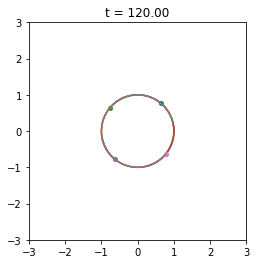

In [72]:
# File output
if store_res:
    print("Writing data file "+filename)
    f = open(filename, "w", newline='')
    for n in range(np.shape(t)[0]):
        f.write('{:8.4f} '.format(t[n]))
        for i in range(nv):
            f.write('{:12.6f} {:12.6f} '.format(x[n,i],y[n,i]))
        f.write('\n')
    f.close()

# Animation    
def init():
    if plot_vort:
        for dot in dots:
            dot.set_data([],[])
    if plot_traj:
        for line in lines:
            line.set_data([],[])
    return tuple(dots) + tuple(lines)

def drawframe(n):
    if plot_vort:
        for i,dot in enumerate(dots):
            dot.set_data(x[n,i],y[n,i])
    if plot_traj:
        for i,line in enumerate(lines):
            line.set_data(x[1:n,i],y[1:n,i])
    txt_title.set_text('t = ' + '{:.2f}'.format(t[n]))
    return tuple(dots) + tuple(lines) + (txt_title,)

if plot_vort or plot_traj:
    print("Building animation")
    fig, ax = plt.subplots()
    ax.axis('square')
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    txt_title = ax.set_title('')
    dots=[];lines=[]
    for i in range(nv):
        vort, = ax.plot([], [], marker='o',markersize=4)   
        traj, = ax.plot([], [])  
        dots.append(vort)
        lines.append(traj)
    anim = animation.FuncAnimation(fig, drawframe, init_func=init, frames=range(np.shape(t)[0]), interval=20, blit=True)   
    print("Writing animation file " + movie_filename)
    anim.save(movie_filename)
    out=HTML(anim.to_html5_video())
    print("*** Type 'out' to see the animation ***")

print("Done")

In [73]:
from IPython.display import Video

# Chemin vers votre fichier vidéo
video_path = "traj.mp4"

# Affiche la vidéo
Video(video_path, embed=True)
